In [ ]:

from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Assuming the file is named 'nba.csv'
file_path = next(iter(uploaded))  # Get the name of the uploaded file
nba_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Display the first few rows of the dataset")
print(nba_data.head())

# Basic information about the dataset
print("Basic information about the dataset")
print(nba_data.info())

# Check for missing values
print("Check for missing values")
print(nba_data.isnull().sum())

# Group by teams and calculate average points
team_avg_points = nba_data.groupby('TEAM')['PTS'].mean()
print("Average Points by Team:")
print(team_avg_points)

# Top 10 players by points
top_scorers = nba_data[['PLAYER', 'PTS']].sort_values(by='PTS', ascending=False).head(10)
print("Top 10 Players by Points for the last 10 years:")
print(top_scorers)

Saving nba.csv to nba.csv
Display the first few rows of the dataset
      year       Season_type  PLAYER_ID  RANK           PLAYER     TEAM_ID  \
0  2012-13  Regular%20Season     201142     1     Kevin Durant  1610612760   
1  2012-13  Regular%20Season        977     2      Kobe Bryant  1610612747   
2  2012-13  Regular%20Season       2544     3     LeBron James  1610612748   
3  2012-13  Regular%20Season     201935     4     James Harden  1610612745   
4  2012-13  Regular%20Season       2546     5  Carmelo Anthony  1610612752   

  TEAM  GP   MIN  FGM  ...  REB  AST  STL  BLK  TOV   PF   PTS   EFF  AST_TOV  \
0  OKC  81  3119  731  ...  640  374  116  105  280  143  2280  2462     1.34   
1  LAL  78  3013  738  ...  433  469  106   25  287  173  2133  1921     1.63   
2  MIA  76  2877  765  ...  610  551  129   67  226  110  2036  2446     2.44   
3  HOU  78  2985  585  ...  379  455  142   38  295  178  2023  1872     1.54   
4  NYK  67  2482  669  ...  460  171   52   32  175  205  

In [ ]:
#Block 2

# Filter out playoffs data to only analyze regular season
nba_data = nba_data[nba_data['Season_type'] == 'Regular%20Season'].copy()


#Identify the top scorers in different seasons and  across all seasons.


# Ensure data types are correct for analysis
nba_data['PTS'] = pd.to_numeric(nba_data['PTS'], errors='coerce')
nba_data['year'] = nba_data['year'].astype(str)


# Identify top scorer for each season
top_scorers_by_season = nba_data.loc[nba_data.groupby('year')['PTS'].idxmax()]
print("Top Scorers by Season:")
print(top_scorers_by_season[['year', 'PLAYER', 'PTS']])


# Identify the top scorer across all seasons
top_scorer_all_time = nba_data.loc[nba_data['PTS'].idxmax()]
print("\nTop Scorer Across All Seasons:")
print(top_scorer_all_time[['year', 'PLAYER', 'PTS']])


Top Scorers by Season:
         year             PLAYER   PTS
0     2012-13       Kevin Durant  2280
677   2013-14       Kevin Durant  2593
1362  2014-15       James Harden  2217
2062  2015-16       James Harden  2376
2753  2016-17  Russell Westbrook  2558
3454  2017-18       LeBron James  2251
4204  2018-19       James Harden  2818
4946  2019-20       James Harden  2335
5692  2020-21      Stephen Curry  2015
6471  2021-22         Trae Young  2155
7293  2022-23       Jayson Tatum  2225
8049  2023-24        Luka Doncic  2370

Top Scorer Across All Seasons:
year           2018-19
PLAYER    James Harden
PTS               2818
Name: 4204, dtype: object


In [ ]:
#Block 3

import pandas as pd


# Filter out playoffs data to only analyze regular season
nba_data_regular_season = nba_data[nba_data['Season_type'] == 'Regular%20Season'].copy()


# Ensure data types are correct for analysis
nba_data['PTS'] = pd.to_numeric(nba_data['PTS'], errors='coerce')
nba_data['REB'] = pd.to_numeric(nba_data['REB'], errors='coerce')  # Ensure rebounds are numeric
nba_data['AST'] = pd.to_numeric(nba_data['AST'], errors='coerce')  # Ensure assists are numeric
nba_data['year'] = nba_data['year'].astype(str)  # Ensure year is treated as a string for grouping


# Group by year and team, and calculate average points, rebounds, and assists per team per year
team_year_avg_stats = nba_data_regular_season.groupby(['year', 'TEAM'])[['PTS', 'REB', 'AST']].sum() / 82


# Loop through each year and display the top teams with the highest average points, rebounds, and assists in a single table
for year in sorted(team_year_avg_stats.index.get_level_values('year').unique()):
    print(f"\nTeams with the Highest Average Stats in {str(year)} (Regular%20Season):")

    # Extract data for the current year
    current_year_data = team_year_avg_stats.loc[year]

    # Sort the data by points, rebounds, and assists and display the top 10 teams
    current_year_data = current_year_data.sort_values(by=['PTS', 'REB', 'AST'], ascending=False)

    # Display the table for the year
    print(current_year_data.head(10))

    print("\n" + "-"*50 + "\n")



Teams with the Highest Average Stats in 2012-13 (Regular%20Season):
             PTS        REB        AST
TEAM                                  
OKC   107.414634  44.829268  21.353659
DEN   106.146341  45.036585  24.414634
MIL   105.182927  45.829268  24.890244
MIA   102.756098  38.451220  23.036585
SAS   102.609756  41.134146  24.987805
SAC   102.353659  40.390244  20.378049
LAL   102.207317  44.804878  22.170732
LAC   101.768293  41.682927  24.121951
BOS   101.658537  39.780488  24.292683
GSW    99.975610  44.439024  22.195122

--------------------------------------------------


Teams with the Highest Average Stats in 2013-14 (Regular%20Season):
             PTS        REB        AST
TEAM                                  
LAC   116.597561  47.268293  25.707317
GSW   111.439024  47.158537  28.073171
OKC   110.719512  46.658537  22.560976
IND   109.804878  51.634146  23.073171
HOU   107.182927  46.024390  20.682927
MIN   106.841463  44.817073  24.121951
POR   106.743902  46.439024  

In [ ]:
#Block 3.5
import pandas as pd

# Example data (replace this with actual loading from your dataset)
# nba_data = pd.read_csv('nba_data.csv')

# Step 1: Group data by year and team, and calculate mean for each metric (PTS, REB, AST)
team_stats_by_year = nba_data.groupby(['year', 'TEAM'])[['PTS', 'REB', 'AST']].sum() / 82

# Step 2: For each metric (PTS, REB, AST), find the top 5 teams across all years
def get_top_teams(metric, n=5):
    top_teams = (team_stats_by_year.groupby('TEAM')[metric].mean().nlargest(n))
    return top_teams

# Get top 5 teams for PTS, REB, and AST across all years
top_5_pts_teams = get_top_teams('PTS')
top_5_reb_teams = get_top_teams('REB')
top_5_ast_teams = get_top_teams('AST')

# Display the top 5 teams for each metric
print("Top 5 Teams by Points (PTS):")
print(top_5_pts_teams)

print("\nTop 5 Teams by Rebounds (REB):")
print(top_5_reb_teams)

print("\nTop 5 Teams by Assists (AST):")
print(top_5_ast_teams)


Top 5 Teams by Points (PTS):
TEAM
LAC    112.225610
MIL    109.738821
OKC    109.629065
DEN    108.484756
HOU    108.273374
Name: PTS, dtype: float64

Top 5 Teams by Rebounds (REB):
TEAM
MIL    45.534553
OKC    45.084350
DEN    44.514228
LAC    44.154472
LAL    44.000000
Name: REB, dtype: float64

Top 5 Teams by Assists (AST):
TEAM
GSW    26.844512
DEN    25.582317
MIL    24.701220
IND    24.396341
SAS    24.300813
Name: AST, dtype: float64


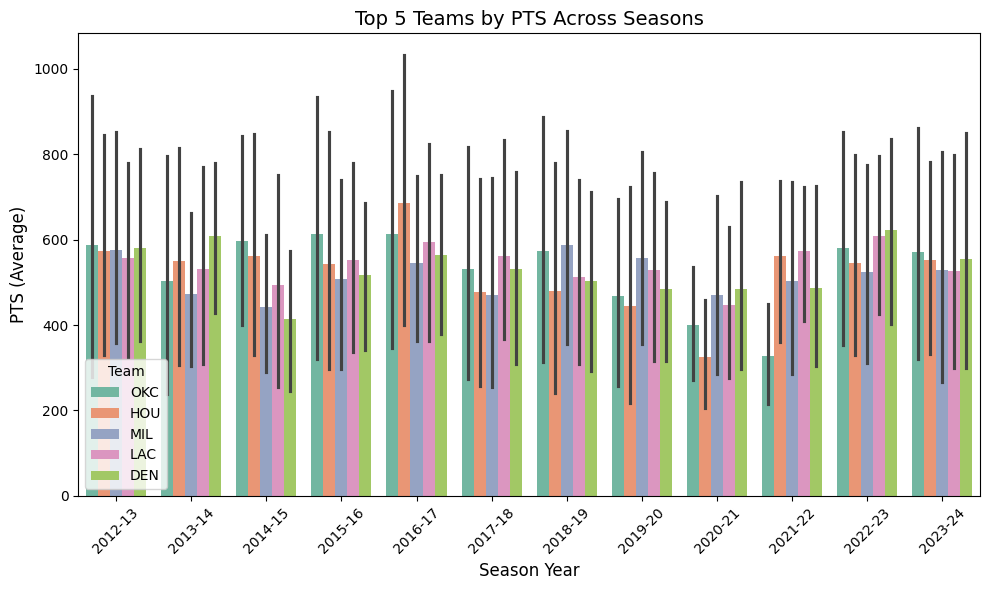

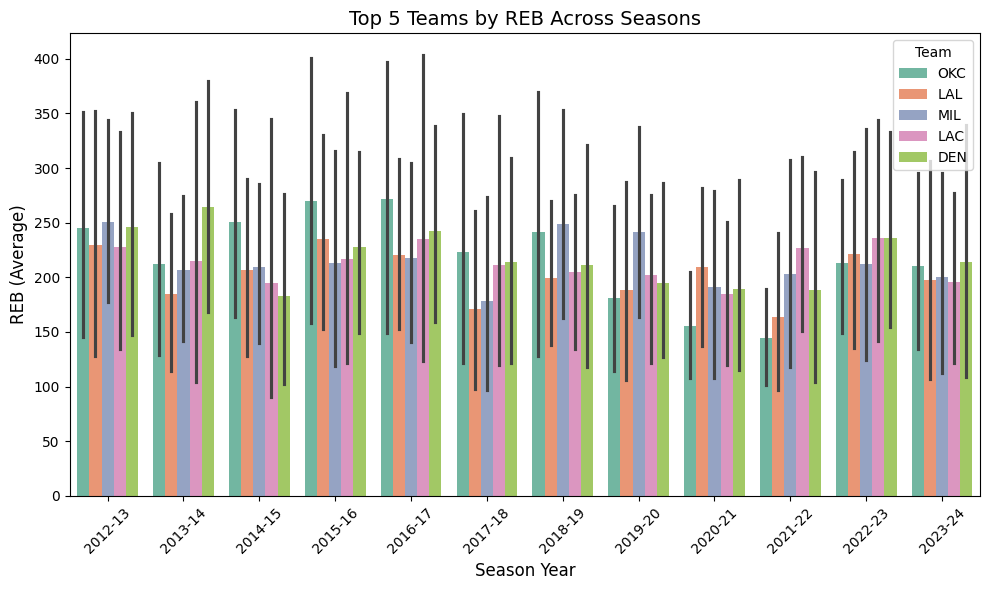

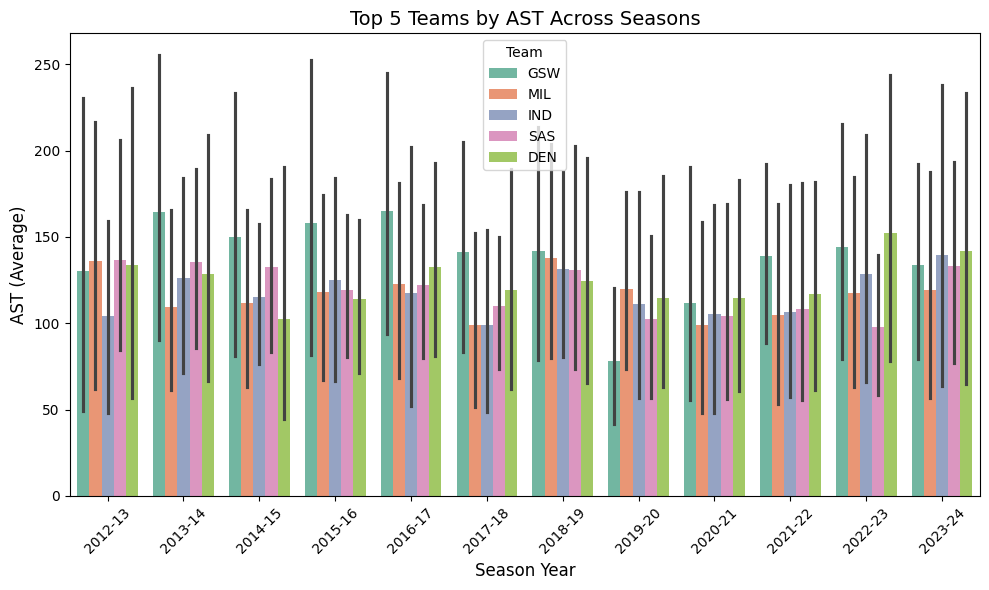

In [ ]:
#Block 3.7
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Plot the performance of the top 5 teams per metric (PTS, REB, AST) across seasons
def plot_top_teams_by_metric(metric, top_teams, title):
    # Filter the data to include only the top 5 teams for the specified metric
    filtered_data = nba_data[nba_data['TEAM'].isin(top_teams.index)]

    # Plot a grouped bar chart showing the performance of these teams over the seasons
    plt.figure(figsize=(10, 6))
    sns.barplot(x='year', y=metric, hue='TEAM', data=filtered_data, palette='Set2')

    # Customize the plot
    plt.title(f"Top 5 Teams by {metric.upper()} Across Seasons", fontsize=14)
    plt.xlabel('Season Year', fontsize=12)
    plt.ylabel(f'{metric.upper()} (Average)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Team')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Step 4: Create bar charts for PTS, REB, and AST
plot_top_teams_by_metric('PTS', top_5_pts_teams, 'Top 5 Teams by Points (PTS)')
plot_top_teams_by_metric('REB', top_5_reb_teams, 'Top 5 Teams by Rebounds (REB)')
plot_top_teams_by_metric('AST', top_5_ast_teams, 'Top 5 Teams by Assists (AST)')


In [ ]:
#Block 4
nba_data['PTS'] = pd.to_numeric(nba_data['PTS'], errors='coerce')
nba_data['year'] = nba_data['year'].astype(str)


# Filter for only Regular Season games
nba_data_regular_season = nba_data[nba_data['Season_type'] == 'Regular%20Season'].copy()


# Ensure the relevant columns are numeric for calculations
nba_data_regular_season['PTS'] = pd.to_numeric(nba_data_regular_season['PTS'], errors='coerce')
nba_data_regular_season['REB'] = pd.to_numeric(nba_data_regular_season['REB'], errors='coerce')
nba_data_regular_season['AST'] = pd.to_numeric(nba_data_regular_season['AST'], errors='coerce')
nba_data_regular_season['STL'] = pd.to_numeric(nba_data_regular_season['STL'], errors='coerce')
nba_data_regular_season['BLK'] = pd.to_numeric(nba_data_regular_season['BLK'], errors='coerce')
nba_data_regular_season['TOV'] = pd.to_numeric(nba_data_regular_season['TOV'], errors='coerce')
nba_data_regular_season['MIN'] = pd.to_numeric(nba_data_regular_season['MIN'], errors='coerce')
nba_data_regular_season['GP'] = pd.to_numeric(nba_data_regular_season['GP'], errors='coerce')
#nba_data_regular_season['year'] = pd.to_numeric(nba_data_regular_season['year'], errors='coerce')  # Ensure year is numeric


# Calculate Efficiency Rating (simplified version)
# Simplified formula: (PTS + REB + AST + STL + BLK - TOV) / MIN
nba_data_regular_season['Efficiency'] = (
    nba_data_regular_season['PTS'] + nba_data_regular_season['REB'] + nba_data_regular_season['AST'] +
    nba_data_regular_season['STL'] + nba_data_regular_season['BLK'] - nba_data_regular_season['TOV']
) / nba_data_regular_season['MIN']


# Identify the most efficient players (with a minimum of a certain number of minutes played to ensure relevance)
min_minutes = 500  # You can adjust this threshold
most_efficient_players = nba_data_regular_season[nba_data_regular_season['MIN'] > min_minutes].sort_values(by='Efficiency', ascending=False).head(10)


print("Most Efficient Players Based on Simplified PER (Regular Season):")
print(most_efficient_players[['PLAYER', 'TEAM', 'year', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'MIN', 'Efficiency']])




Most Efficient Players Based on Simplified PER (Regular Season):
                     PLAYER TEAM     year   PTS   REB  AST  STL  BLK  TOV  \
4949  Giannis Antetokounmpo  MIL  2019-20  1857   856  354   61   66  230   
8096            Joel Embiid  PHI  2023-24  1353   430  219   46   66  150   
7297  Giannis Antetokounmpo  MIL  2022-23  1959   742  359   52   51  246   
2753      Russell Westbrook  OKC  2016-17  2558   864  840  132   31  438   
6475           Nikola Jokic  DEN  2021-22  2004  1019  584  109   63  281   
6476  Giannis Antetokounmpo  MIL  2021-22  2002   778  388   72   91  219   
4210  Giannis Antetokounmpo  MIL  2018-19  1994   898  424   92  110  268   
6473            Joel Embiid  PHI  2021-22  2079   796  284   77   99  214   
8049            Luka Doncic  DAL  2023-24  2370   647  686   99   38  282   
8053           Nikola Jokic  DEN  2023-24  2085   976  708  108   68  237   

       MIN  Efficiency  
4949  1917    1.546166  
8096  1309    1.500382  
7297  2024  

In [ ]:
#Block 5


nba_data['PTS'] = pd.to_numeric(nba_data['PTS'], errors='coerce')
nba_data['year'] = nba_data['year'].astype(str)


# Filter for only Regular Season games
nba_data_regular_season = nba_data[nba_data['Season_type'] == 'Regular%20Season'].copy()


# Ensure the relevant columns are numeric for calculations
nba_data_regular_season['PTS'] = pd.to_numeric(nba_data_regular_season['PTS'], errors='coerce')
nba_data_regular_season['REB'] = pd.to_numeric(nba_data_regular_season['REB'], errors='coerce')
nba_data_regular_season['AST'] = pd.to_numeric(nba_data_regular_season['AST'], errors='coerce')
nba_data_regular_season['STL'] = pd.to_numeric(nba_data_regular_season['STL'], errors='coerce')
nba_data_regular_season['BLK'] = pd.to_numeric(nba_data_regular_season['BLK'], errors='coerce')
nba_data_regular_season['TOV'] = pd.to_numeric(nba_data_regular_season['TOV'], errors='coerce')
nba_data_regular_season['MIN'] = pd.to_numeric(nba_data_regular_season['MIN'], errors='coerce')
nba_data_regular_season['GP'] = pd.to_numeric(nba_data_regular_season['GP'], errors='coerce')


# Calculate Efficiency Rating (simplified version)
# Simplified formula: (PTS + REB + AST + STL + BLK - TOV) / MIN
nba_data_regular_season['Efficiency'] = (
    nba_data_regular_season['PTS'] + nba_data_regular_season['REB'] + nba_data_regular_season['AST'] +
    nba_data_regular_season['STL'] + nba_data_regular_season['BLK'] - nba_data_regular_season['TOV']
) / nba_data_regular_season['MIN']


# Identify the most efficient player for each year
min_minutes = 500  # You can adjust this threshold


# Filter players based on minimum minutes played
nba_data_regular_season = nba_data_regular_season[nba_data_regular_season['MIN'] > min_minutes]


# Group by year and find the player with the highest efficiency for each year
most_efficient_per_year = nba_data_regular_season.loc[nba_data_regular_season.groupby('year')['Efficiency'].idxmax()]


# Display the most efficient players for each year
print("Most Efficient Players for Each Year (Regular%20Season):")
print(most_efficient_per_year[['PLAYER', 'TEAM', 'year', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'MIN', 'Efficiency']])


Most Efficient Players for Each Year (Regular%20Season):
                     PLAYER TEAM     year   PTS   REB  AST  STL  BLK  TOV  \
2              LeBron James  MIA  2012-13  2036   610  551  129   67  226   
680              Kevin Love  MIN  2013-14  2010   963  341   59   35  196   
1364      Russell Westbrook  OKC  2014-15  1886   488  574  140   14  293   
2063          Stephen Curry  GSW  2015-16  2375   430  527  169   15  262   
2753      Russell Westbrook  OKC  2016-17  2558   864  840  132   31  438   
3455           James Harden  HOU  2017-18  2191   389  630  126   50  315   
4210  Giannis Antetokounmpo  MIL  2018-19  1994   898  424   92  110  268   
4949  Giannis Antetokounmpo  MIL  2019-20  1857   856  354   61   66  230   
5697  Giannis Antetokounmpo  MIL  2020-21  1717   671  357   72   73  207   
6475           Nikola Jokic  DEN  2021-22  2004  1019  584  109   63  281   
7297  Giannis Antetokounmpo  MIL  2022-23  1959   742  359   52   51  246   
8096            Joe

<ipython-input-9-34420cfa7341>:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_shooters_by_season = nba_data.groupby('year').apply(lambda x: x.loc[x['FG_PCT'].idxmax()])


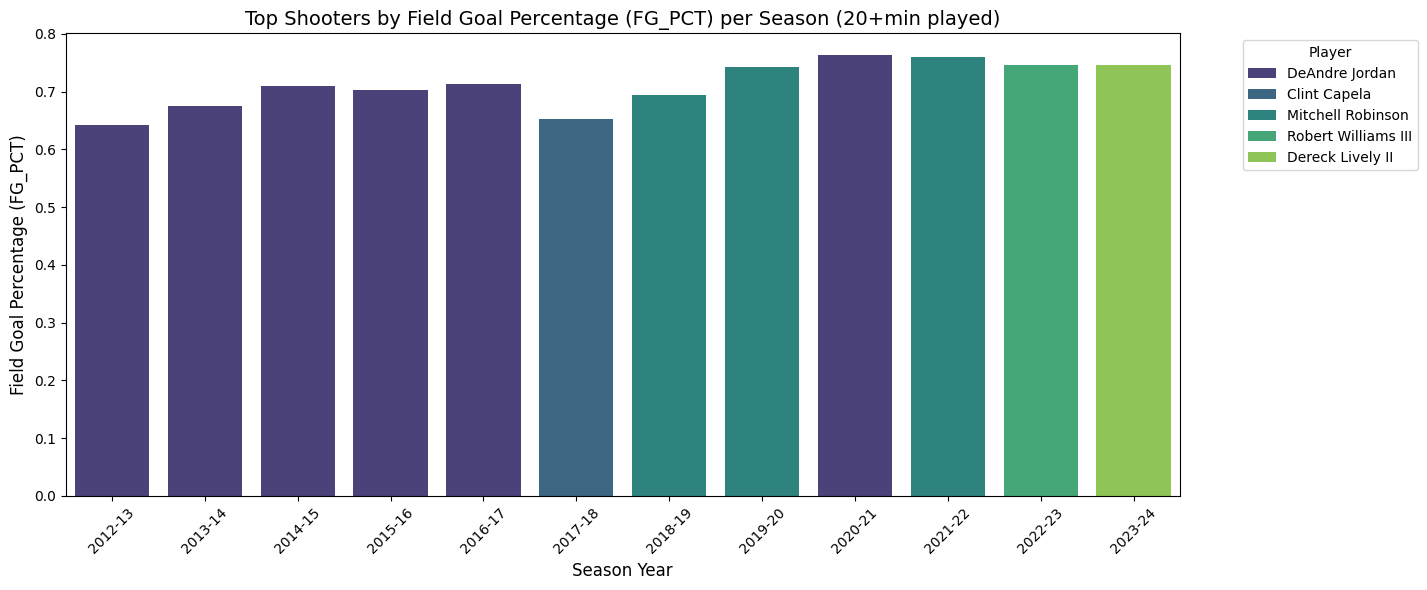

Players with the Highest Shooting Accuracy by Season (Field Goal Percentage):
            year               PLAYER TEAM  FG_PCT
year                                              
2012-13  2012-13       DeAndre Jordan  LAC   0.643
2013-14  2013-14       DeAndre Jordan  LAC   0.676
2014-15  2014-15       DeAndre Jordan  LAC   0.710
2015-16  2015-16       DeAndre Jordan  LAC   0.703
2016-17  2016-17       DeAndre Jordan  LAC   0.714
2017-18  2017-18         Clint Capela  HOU   0.652
2018-19  2018-19    Mitchell Robinson  NYK   0.694
2019-20  2019-20    Mitchell Robinson  NYK   0.742
2020-21  2020-21       DeAndre Jordan  BKN   0.763
2021-22  2021-22    Mitchell Robinson  NYK   0.761
2022-23  2022-23  Robert Williams III  BOS   0.747
2023-24  2023-24     Dereck Lively II  DAL   0.747


In [ ]:
#Block 6
import matplotlib.pyplot as plt
import seaborn as sns


# Filter for only Regular Season games
nba_data = nba_data[nba_data['Season_type'] == 'Regular%20Season'].copy()


# Ensure the relevant columns are numeric for calculations
nba_data['FG_PCT'] = pd.to_numeric(nba_data['FG_PCT'], errors='coerce')
nba_data['FG3_PCT'] = pd.to_numeric(nba_data['FG3_PCT'], errors='coerce')
nba_data['FT_PCT'] = pd.to_numeric(nba_data['FT_PCT'], errors='coerce')
nba_data['MIN'] = pd.to_numeric(nba_data['MIN'], errors='coerce')
nba_data['GP'] = pd.to_numeric(nba_data['GP'], errors='coerce')  # Games played


# Define minimum minutes played per game (to normalize shooting stats)
min_minutes_per_game = 20  # Example threshold


# Filter players based on the minimum minutes played per game (MIN / GP)
nba_data = nba_data[nba_data['MIN'] / nba_data['GP'] >= min_minutes_per_game]


# Identify players with the highest shooting accuracy in each season (normalized for minutes played)
top_shooters_by_season = nba_data.groupby('year').apply(lambda x: x.loc[x['FG_PCT'].idxmax()])


# Visualize the top shooters by season using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='FG_PCT', data=top_shooters_by_season, hue='PLAYER', dodge=False, palette='viridis')


# Set plot labels and title
plt.title('Top Shooters by Field Goal Percentage (FG_PCT) per Season (20+min played)', fontsize=14)
plt.xlabel('Season Year', fontsize=12)
plt.ylabel('Field Goal Percentage (FG_PCT)', fontsize=12)


# Rotate x-axis labels for readability
plt.xticks(rotation=45)


# Show plot
plt.tight_layout()
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


print("Players with the Highest Shooting Accuracy by Season (Field Goal Percentage):")
print(top_shooters_by_season[['year', 'PLAYER', 'TEAM', 'FG_PCT']])


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Exclude non-numeric columns from the dataset (like 'year' and 'PLAYER')
numeric_data = nba_data.select_dtypes(include=['float64', 'int64'])


# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()


# Display the correlation matrix
print(correlation_matrix)


# Set up the matplotlib figure
plt.figure(figsize=(12, 8))


# Generate a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


# Title and display the plot
plt.title('Correlation Matrix of NBA Metrics')
plt.show()


           PLAYER_ID      RANK   TEAM_ID        GP       MIN       FGM  \
PLAYER_ID   1.000000  0.134800  0.043022 -0.149440 -0.167975 -0.090435   
RANK        0.134800  1.000000  0.009477 -0.696385 -0.861988 -0.904806   
TEAM_ID     0.043022  0.009477  1.000000  0.010234 -0.012703 -0.019197   
GP         -0.149440 -0.696385  0.010234  1.000000  0.856358  0.567223   
MIN        -0.167975 -0.861988 -0.012703  0.856358  1.000000  0.815916   
FGM        -0.090435 -0.904806 -0.019197  0.567223  0.815916  1.000000   
FGA        -0.102006 -0.906798 -0.008010  0.576241  0.826300  0.971369   
FG_PCT      0.048533 -0.178687 -0.032880  0.132034  0.130726  0.241820   
FG3M        0.044393 -0.504715 -0.052223  0.342003  0.469157  0.451172   
FG3A        0.055762 -0.520810 -0.046901  0.355685  0.486434  0.467116   
FG3_PCT     0.063903 -0.121423 -0.020884  0.015456  0.063000  0.070139   
FTM        -0.130368 -0.729771 -0.002886  0.369282  0.624893  0.820326   
FTA        -0.135982 -0.725450 -0.0002

The heatmap displays the correlation matrix for the NBA metrics. Here's an analysis of the key observations:

# **Strong Positive Correlations (Values close to 1):**
**FGM (Field Goals Made) vs. PTS (Points):** Correlation ~0.99. This is expected, as scoring more field goals directly leads to more points.
FGA (Field Goals Attempted) vs. PTS (Points): Correlation ~0.99. Players who attempt more field goals tend to score more points.

**REB (Total Rebounds) vs. OREB/DREB (Offensive/Defensive Rebounds):** Correlation ~0.99. Total rebounds are almost perfectly correlated with offensive and defensive rebounds combined.

**MIN (Minutes Played) vs. various stats (PTS, FGM, etc.):** Players who spend more time on the court tend to accumulate more stats across different categories, such as points, field goals, and assists.
# **Strong Negative Correlations (Values close to -1):**
There aren't many significant negative correlations, though some metrics are inversely related, but with weak correlation values.

# **Notable Medium-High Correlations (0.7 - 0.9):**
**AST (Assists) vs. PTS (Points):** A relatively strong positive correlation (~0.79). Players with more assists are often involved in more scoring plays.

**OREB/DREB (Offensive/Defensive Rebounds) vs. REB (Total Rebounds):** As expected, these individual components contribute directly to the total rebounds.
# **Weak or No Correlations (Values close to 0):**
**TEAM_ID vs. all other stats:** As expected, there’s no significant correlation between team identifiers and player statistics.

**PLAYER_ID vs. all other stats:** This is a unique identifier and doesn’t correlate with performance metrics.
# **Conclusion:**
The most strongly correlated metrics are field goals attempted/made with points, as well as minutes played with performance metrics like points and assists. Rebounds also show strong internal correlation between offensive, defensive, and total rebounds. These correlations make sense in the context of basketball performance, where key performance indicators tend to cluster.

Would you like to dive deeper into any specific correlations or analyze other aspects?

Correlation between 3-point Field Goals Made (FG3M) and Points (PTS): 0.54


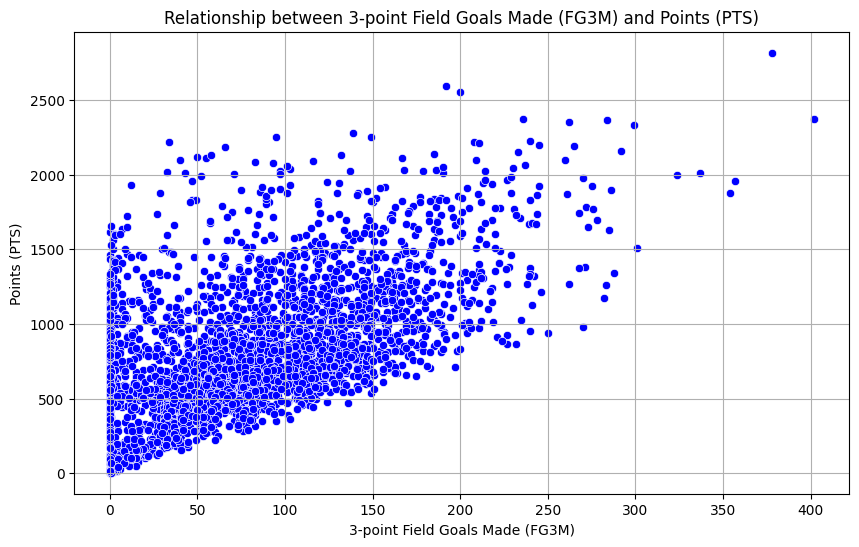

Top 10 Scorers and Their 3-Point Field Goals Made:
                       PLAYER   PTS  FG3M
4204             James Harden  2818   378
677              Kevin Durant  2593   192
2753        Russell Westbrook  2558   200
2062             James Harden  2376   236
2063            Stephen Curry  2375   402
8049              Luka Doncic  2370   284
2754             James Harden  2356   262
4946             James Harden  2335   299
0                Kevin Durant  2280   139
8050  Shai Gilgeous-Alexander  2254    95


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the correlation between 3-point field goals made and total points
correlation_fg3m_pts = nba_data['FG3M'].corr(nba_data['PTS'])
print(f"Correlation between 3-point Field Goals Made (FG3M) and Points (PTS): {correlation_fg3m_pts:.2f}")


# Scatter plot to visualize the relationship between FG3M and PTS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FG3M', y='PTS', data=nba_data, color='blue')
plt.title('Relationship between 3-point Field Goals Made (FG3M) and Points (PTS)')
plt.xlabel('3-point Field Goals Made (FG3M)')
plt.ylabel('Points (PTS)')
plt.grid(True)
plt.show()


# Top 10 scorers
top_scorers = nba_data[['PLAYER', 'PTS', 'FG3M']].sort_values(by='PTS', ascending=False).head(10)
print("Top 10 Scorers and Their 3-Point Field Goals Made:")
print(top_scorers)


# **Scatter Plot Results**
The scatter plot shows a clear positive trend: as the number of 3-point field goals made (FG3M) increases, the total points (PTS) also tend to increase.
However, the spread of points indicates that some players score a significant number of points even without relying heavily on 3-pointers, while others who make a lot of 3-pointers also score a lot.
# **Top 10 Scorers:**
James Harden appears multiple times in the top 10, making him one of the top scorers and also one of the top 3-point shooters, especially with 378 and 299 made 3-pointers in different seasons.
Stephen Curry is a notable example with 402 made 3-pointers, showing that a significant portion of his points come from 3-point shooting.
Other top scorers, like Shai Gilgeous-Alexander and Kevin Durant in one of the entries, score high points but have relatively fewer 3-point field goals made compared to others (95 and 139).
# **Conclusion:**
There is a clear correlation between making 3-point field goals and scoring high points, but not all top scorers are necessarily the best 3-point shooters. Players like Shai Gilgeous-Alexander rely less on 3-pointers, while players like Stephen Curry and James Harden significantly contribute to their points through 3-pointers.

In [ ]:
'''To find out which players contribute the most to their team's offense by combining their points (PTS)
and assists (AST), we can create a new metric called "Offensive Contribution" (which is the sum of points
and assists) and then identify the top players.'''

# Create a new column 'Offensive_Contribution' which is the sum of points (PTS) and assists (AST)
nba_data['Offensive_Contribution'] = nba_data['PTS'] + nba_data['AST']

# Sort the players based on their offensive contribution
top_offensive_contributors = nba_data[['PLAYER', 'TEAM', 'PTS', 'AST', 'Offensive_Contribution']].sort_values(by='Offensive_Contribution', ascending=False).head(10)

# Display the top 10 players with the highest offensive contribution
print("Top 10 Players with the Highest Offensive Contribution (Points + Assists):")
print(top_offensive_contributors)

Top 10 Players with the Highest Offensive Contribution (Points + Assists):
                 PLAYER TEAM   PTS  AST  Offensive_Contribution
4204       James Harden  HOU  2818  586                    3404
2753  Russell Westbrook  OKC  2558  840                    3398
2754       James Harden  HOU  2356  907                    3263
8049        Luka Doncic  DAL  2370  686                    3056
677        Kevin Durant  OKC  2593  445                    3038
3454       LeBron James  CLE  2251  747                    2998
2062       James Harden  HOU  2376  612                    2988
2063      Stephen Curry  GSW  2375  527                    2902
6471         Trae Young  ATL  2155  737                    2892
3457  Russell Westbrook  OKC  2028  820                    2848


In [ ]:
import pandas as pd

# Load the dataset (ensure this points to your file)
file_path = 'nba.csv'
nba_data = pd.read_csv(file_path)

# Function to extract the year from the 'year' column
def extract_start_year(season: str):
    return int(season.split('-')[0])

def get_player_stats(player_name: str, data: pd.DataFrame):
    # Filter out playoff seasons and only include regular season stats
    regular_season_data = data[data['Season_type'] == 'Regular%20Season']

    # Apply the year extraction to the 'year' column
    regular_season_data['year'] = regular_season_data['year'].apply(extract_start_year)

    # Filter by player name
    player_data = regular_season_data[regular_season_data['PLAYER'].str.lower() == player_name.lower()]

    if player_data.empty:
        print(f"No data found for player: {player_name}")
        return

    # Display the stats for each year
    print(player_data[['year', 'TEAM', 'GP', 'MIN', 'PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']])

def main():
    # Ask for player name input
    player_name = input("Enter the player's name: ")

    # Fetch and display the player stats
    get_player_stats(player_name, nba_data)

# Run the program
if __name__ == "__main__":
    main()





FileNotFoundError: [Errno 2] No such file or directory: 'nba.csv'